# 폰트 다운로드
- 설치된 폰트 목록에 '나눔' 폰트가 없어서 설치해줌

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

## 설치된 폰트 확인

In [1]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmmi10',
 'cmtt10',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXGeneral',
 'Liberation Sans',
 'NanumGothic',
 'Liberation Sans',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumBarunGothic',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumMyeongjo',
 'Liberation Mono',
 'NanumSquare',
 'Liberation Serif',
 'NanumSquare',
 'Liberation Serif',
 

# 데이터셋 불러오기

In [45]:
import pandas as pd

df = pd.read_csv('/content/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 데이터 전처리

### 데이터 수정
불필요하다 판단되는 첫번째 컬럼(Unnamed: 0) 을 지우고, 

컬럼의 이름을 한국어로 변경

In [46]:
df1 = df.drop('Unnamed: 0', axis=1)
df1.rename(columns={'Name':'게임의이름','Platform':'지원되는플랫폼','Year':'출시된연도','Genre':'장르','Publisher':'제작한회사','NA_Sales':'북미_출고량','EU_Sales':'유럽_출고량','JP_Sales':'일본_출고량','Other_Sales':'기타_출고량'},inplace = True)

### 데이터 확인

In [47]:
df1

,게임의이름,지원되는플랫폼,출시된연도,장르,제작한회사,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [48]:
df1.dtypes

게임의이름       object
지원되는플랫폼     object
출시된연도      float64
장르          object
제작한회사       object
북미_출고량      object
유럽_출고량      object
일본_출고량      object
기타_출고량      object
dtype: object

### 오류 발생

지역별 출고량 데이터가 실수형으로 보이지만 실제 데이터타입은 문자형 형태로 보인다.

이것을 숫자형 타입으로 변환하기위해 apply 함수를 적용했지만, 오류가 발생

In [49]:
df1[['북미_출고량','유럽_출고량','일본_출고량','기타_출고량']] = df1[['북미_출고량','유럽_출고량','일본_출고량','기타_출고량']].apply(pd.to_numeric)

ValueError: ignored

### 오류 파악

출고량 컬럼에 들어있는 값들을 확인 해 보니 숫자 + 문자 형태로 이루어진게 보임

In [50]:
df1['기타_출고량'].unique()

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.21',
       '0.08', '0.05', '0.03', '0.1', '0M', '0.01M', '0.2', '0.9', '0.32',
       '0.07', '0.34', '0.22', '0.37', '0.14', '1.07', '10K', '0.25',
       '0K', '0.24', '0.16', '0.09', '0.58', '30K', '0.13', '0.18',
       '0.12', '0.27', '0.77', '0.39', '0.44', '0.26', '1.18', '0.11',
       '0.72', '0.28', '0.19', '1.09', '0.54', '0.06M', '1.75', '2.46',
       '0.31', '0.17', '0.33', '1.16', '0.7', '50K', '0.42', '0.29',
       '0.41', '0.61', '0.57', '1.14', '0.64', '0.43', '0.3', '0.35',
       '0.66', '0.79', '0.05M', '0.4', '2.02', '0.69', '0.73', '0.18M',
       '0.99', '40K', '80K', '0.36', '1.26', '0.52', '1.73', '0.03M',
       '0.47', '1.68', '0.48', '1.32', '0.59', '8.46', '2.85', '1.23',
       '0.75', '1.47', '0.49', '0.88', '2.96', '2.15', '4.14', '0.53',
       '0.04M', '0.38', '0.02M', '0.46', '0.65', '0.51', '1.04', '2.52',
       '0.78', '1.67', '0.2M', '0.68', '1.48', '0.87', '1.41', '20K',
       '0.

### 오류 해결

문자를 제거하는 함수를 생성 후 적용

In [51]:
def change(str):
  if 'K' in str:
    # len() 문자열의 길이를 구하는 함수
    # 앞에서부터 받은 문자열에서 -1 (맨 뒤에있는 글자) 을 해줌 
    str = str[:len(str)-1]
    # K 를 지우고 그 자리에 str * 1000 (1000 을 곱해줌)
    str = float(str)*1000
  elif 'M' in str:
    str = str[:len(str)-1]
    # M 을 지우고 그 자리에 str * 1000000 (100만을 곱해줌)
    str = float(str)*1000000
  else:
    str = float(str)*1000000
    return str

for columns in ['북미_출고량','유럽_출고량','일본_출고량','기타_출고량']:
    df1[columns] = df1[columns].apply(change)

### 변경된 데이터 확인

In [52]:
df1

,게임의이름,지원되는플랫폼,출시된연도,장르,제작한회사,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [53]:
df1['북미_출고량'].unique()

array([4.000e+04, 1.700e+05, 0.000e+00, 1.200e+05, 2.000e+04, 7.000e+04,
             nan, 1.400e+05, 1.000e+04, 5.700e+05, 6.000e+04, 8.000e+04,
       4.800e+05, 3.000e+04, 5.000e+04, 1.930e+06, 2.900e+05, 1.900e+05,
       3.000e+05, 2.600e+05, 1.100e+05, 1.800e+05, 3.300e+05, 5.100e+05,
       1.300e+05, 5.200e+05, 3.400e+05, 2.500e+05, 4.100e+05, 2.200e+05,
       3.500e+05, 1.000e+05, 6.700e+05, 5.900e+05, 3.600e+05, 2.100e+05,
       1.190e+06, 5.910e+06, 1.980e+06, 9.000e+04, 5.000e+05, 9.400e+05,
       1.600e+05, 6.300e+05, 4.300e+05, 2.000e+05, 1.230e+06, 4.400e+05,
       4.200e+05, 9.700e+05, 2.670e+06, 2.800e+05, 6.050e+06, 4.700e+05,
       4.900e+05, 6.200e+05, 2.400e+05, 7.200e+05, 1.740e+06, 4.600e+05,
       6.500e+05, 3.200e+05, 1.530e+06, 2.300e+05, 5.300e+05, 3.700e+05,
       1.260e+06, 3.900e+05, 5.800e+05, 1.940e+06, 2.310e+06, 1.030e+06,
       8.200e+05, 4.000e+05, 9.300e+05, 5.600e+05, 9.600e+05, 1.640e+06,
       6.900e+05, 1.250e+06, 2.700e+05, 9.200e+05, 

In [54]:
df1.dtypes

게임의이름       object
지원되는플랫폼     object
출시된연도      float64
장르          object
제작한회사       object
북미_출고량     float64
유럽_출고량     float64
일본_출고량     float64
기타_출고량     float64
dtype: object

### 결측치 확인 후 제거

In [55]:
df1.isnull().sum()

게임의이름        0
지원되는플랫폼      0
출시된연도      271
장르          50
제작한회사       58
북미_출고량     200
유럽_출고량     200
일본_출고량     199
기타_출고량     200
dtype: int64

In [60]:
df2 = df1.dropna(axis=0)
df2

,게임의이름,지원되는플랫폼,출시된연도,장르,제작한회사,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


# 1. 지역에 따라서 선호하는 게임 장르가 다를까?

### 각 컬럼을 기준으로 지역별 장르 시각화

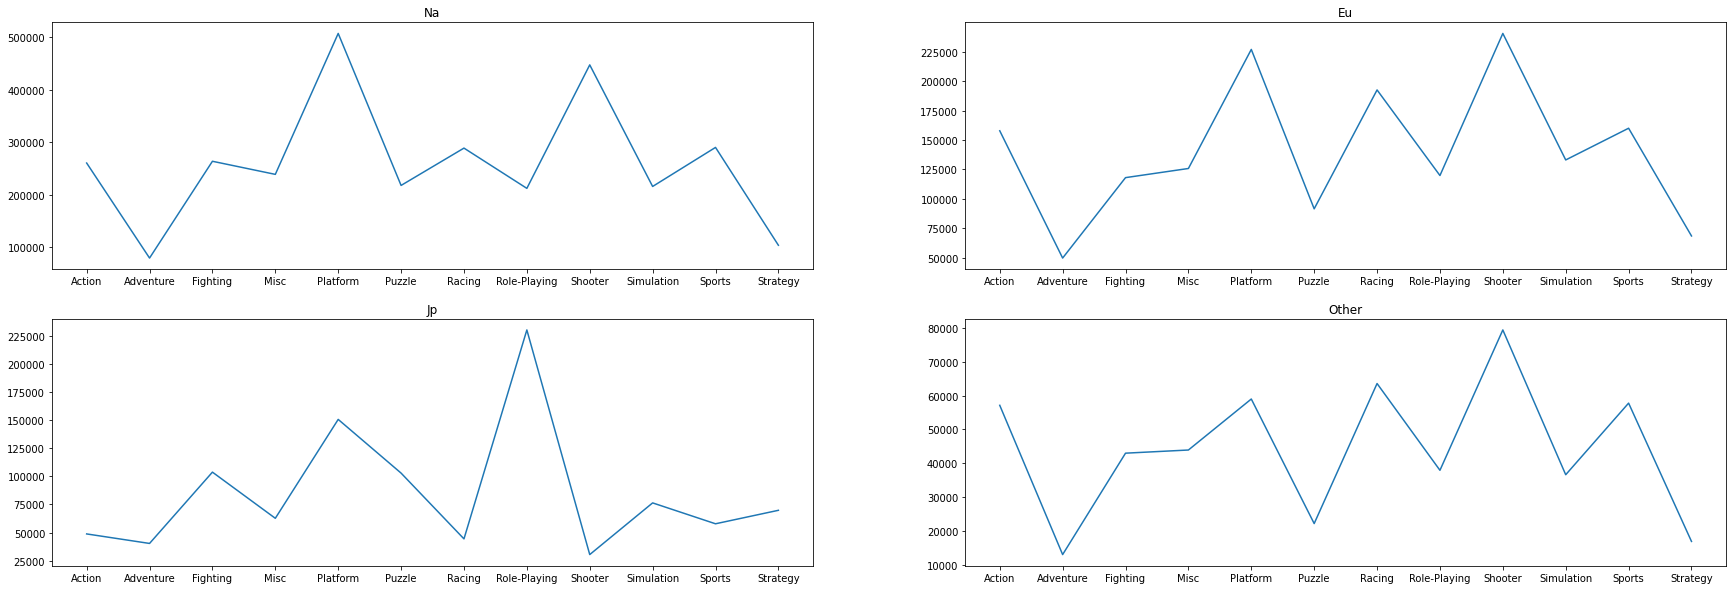

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl

na_sales = df2.groupby('장르')['북미_출고량'].mean()
eu_sales = df2.groupby('장르')['유럽_출고량'].mean()
jp_sales = df2.groupby('장르')['일본_출고량'].mean()
other_sales = df2.groupby('장르')['기타_출고량'].mean()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (30, 10))

ax[0,0].plot(na_sales)
ax[0,0].set_title('Na')

ax[0,1].plot(eu_sales)
ax[0,1].set_title('Eu')

ax[1,0].plot(jp_sales)
ax[1,0].set_title('Jp')

ax[1,1].plot(other_sales)
ax[1,1].set_title('Other')

#fig.autofmt_xdate()

plt.show()

## 결론 

우선, 전체적으로 북미 시장의 출고량이 다른 지역에 비해 월등히 높다는것을 확인할 수 있다.

또한 모든 지역에서 Platform 게임의 출고량이 비슷한 패턴을 갖고 있고,

일본 지역을 제외한 세 지역의 Shooter 비율이 비슷함을 볼 수 있다.

일본 지역은 Role-Playing 게임의 출고량이 최고치를 보여줌으로써 다른 지역들과의 차이를 갖고있다.

결론,
일본을 제외한 나머지 지역은 대체적으로 선호하는 장르가 비슷하다고 생각한다.

# 2. 연도별 게임의 트렌드가 있을까?

### 데이터 확인

In [62]:
df2.dtypes

게임의이름       object
지원되는플랫폼     object
출시된연도      float64
장르          object
제작한회사       object
북미_출고량     float64
유럽_출고량     float64
일본_출고량     float64
기타_출고량     float64
dtype: object

In [63]:
df2['출시된연도'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03, 1.997e+03,
       2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03, 1.998e+03,
       2.001e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 8.600e+01, 1.400e+01, 9.500e+01, 2.017e+03,
       1.980e+03, 1.600e+01, 2.000e+00, 1.300e+01, 0.000e+00, 1.200e+01,
       9.400e+01])

## 연도의 데이터타입 변경

In [66]:
df2['출시된연도'] = df2['출시된연도'].astype(pd.Int64Dtype())
df2.dtypes

게임의이름       object
지원되는플랫폼     object
출시된연도        Int64
장르          object
제작한회사       object
북미_출고량     float64
유럽_출고량     float64
일본_출고량     float64
기타_출고량     float64
dtype: object

## 데이터의 이상 인지

- 표준편차와 최솟값이 이상함

In [67]:
df2.describe()

,출시된연도,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
count,15476.000000,1.547600e+04,1.547600e+04,1.547600e+04,1.547600e+04
mean,1994.340010,2.636799e+05,1.463718e+05,7.781016e+04,4.834389e+04
std,154.463026,8.241880e+05,5.103545e+05,3.098210e+05,1.926125e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04
max,2017.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


## 연도 데이터 수정

In [40]:
def year(a):
# 만약, a가 21보다 작다면
  if a < 21:
# a에 2000 을 더해라
      return a + 2000

# a가 21보다 크거나 같거나, a가 1900보다 작다면
  elif a >= 21 and a < 1900:
# a 에 1900 을 더해라 
      return a + 1900
  else:
      return a

In [68]:
df2['출시된연도'] = df2['출시된연도'].apply(year)
df2

,게임의이름,지원되는플랫폼,출시된연도,장르,제작한회사,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


### 변경된 데이터 확인

In [69]:
df2.describe()

,출시된연도,북미_출고량,유럽_출고량,일본_출고량,기타_출고량
count,15476.000000,1.547600e+04,1.547600e+04,1.547600e+04,1.547600e+04
mean,2006.403851,2.636799e+05,1.463718e+05,7.781016e+04,4.834389e+04
std,5.834873,8.241880e+05,5.103545e+05,3.098210e+05,1.926125e+05
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04
max,2017.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


In [70]:
df2.dtypes

게임의이름       object
지원되는플랫폼     object
출시된연도        int64
장르          object
제작한회사       object
북미_출고량     float64
유럽_출고량     float64
일본_출고량     float64
기타_출고량     float64
dtype: object

## Feature Engineering

### - 총 출고량 Feature 생성

In [72]:
df2['총_출고량'] = df2['북미_출고량'] + df2['유럽_출고량']+df2['일본_출고량']+df2['기타_출고량']
df2

,게임의이름,지원되는플랫폼,출시된연도,장르,제작한회사,북미_출고량,유럽_출고량,일본_출고량,기타_출고량,총_출고량
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


## 데이터 전처리

### - 필요한 열만 남기고 제거
- 오름차순 정렬

In [73]:
df3 = df2.drop(['게임의이름','지원되는플랫폼','북미_출고량','유럽_출고량','일본_출고량','기타_출고량'],axis = 1)
df3.sort_values(by=['출시된연도'], ascending=True)

,출시된연도,장르,제작한회사,총_출고량
14264,1980,Fighting,Activision,770000.0
10121,1980,Misc,Atari,1050000.0
5723,1980,Shooter,Atari,4310000.0
5938,1980,Misc,Activision,1150000.0
13133,1980,Action,Activision,340000.0
...,...,...,...,...
8505,2016,Role-Playing,Activision,280000.0
7947,2016,Action,Activision,70000.0
10107,2017,Role-Playing,Sega,30000.0
5310,2017,Action,Idea Factory,10000.0


### 데이터 확인
- 장르의 고윳값 확인

In [74]:
df3['장르'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

### 연도별 장르 개수 파악하기

In [75]:
year_genre_count = df3.groupby(['출시된연도', '장르']).size().reset_index(name='갯수')
year_genre_count

,출시된연도,장르,갯수
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,3
3,1980,Shooter,2
4,1981,Action,24
...,...,...,...
381,2016,Simulation,8
382,2016,Sports,35
383,2016,Strategy,9
384,2017,Action,1


### 장르 중 최댓값 추출
- 연도와 장르를 기준으로 제일 큰 값을 출력

In [77]:
year_genre_max = year_genre_count.groupby(['출시된연도'])['갯수'].transform(max) == year_genre_count['갯수']

### 중복값 확인
-  같은 연도에 최댓값이 같은 장르가 같이 출력된다.

In [78]:
data = year_genre_count[year_genre_max].reset_index(drop=True)
data

,출시된연도,장르,갯수
0,1980,Misc,3
1,1981,Action,24
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1984,Shooter,3
6,1985,Puzzle,4
7,1986,Action,6
8,1986,Platform,6
9,1987,Sports,4


### 중복값 제거

In [79]:
year_genre_data = data.drop_duplicates(subset=['출시된연도','갯수']).reset_index(drop=True)
year_genre_data

,출시된연도,장르,갯수
0,1980,Misc,3
1,1981,Action,24
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Puzzle,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,3
9,1989,Puzzle,4


## 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_

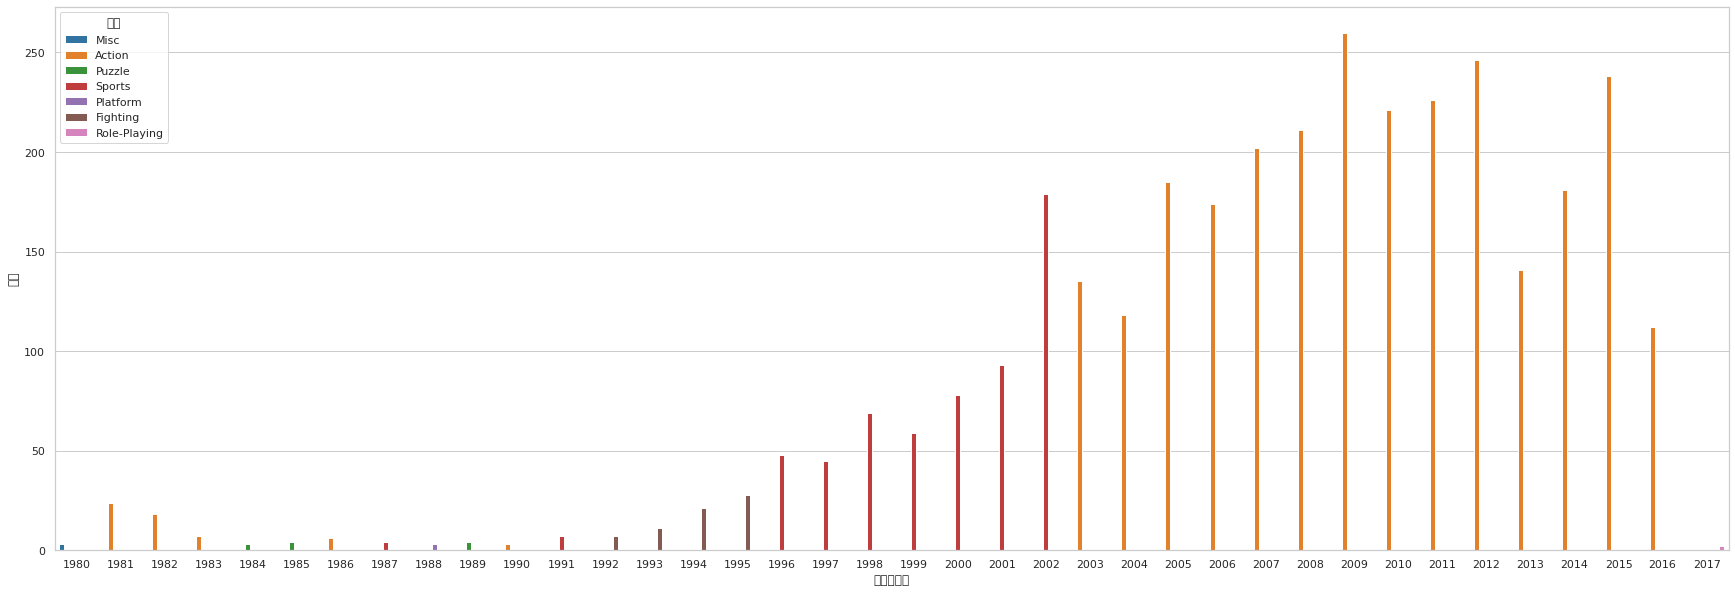

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'
sns.set_context('notebook')
sns.set_style('whitegrid')

plt.figure(figsize=(30, 10))

sns.barplot(x = "출시된연도", y = "갯수", hue = '장르', data = year_genre_data)
plt.show()

### 결론

앞선 년도에서는 다양한 게임의 분포를 확인할 수 있었는데,

그래프를 확인 해 보면,

1996년도 부터 스포츠 게임의 이용자가 점점 많아지던 추세에, 2002년에 피크를 찍었다.

이후 년도부터는,

스포츠 게임의 인기는 점차 사그러드는 추세가 확인되었고,

새로운 장르인 액션 게임이 전세계적으로 인기가있음을 확인할 수 있다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 데이터 전처리
- 원하는 데이터만 남기고 제거

In [83]:
high_sales = df2.drop(['지원되는플랫폼','출시된연도','북미_출고량','유럽_출고량','일본_출고량','기타_출고량'],axis = 1)
high_sales

,게임의이름,장르,제작한회사,총_출고량
0,Candace Kane's Candy Factory,Action,Destineer,40000.0
1,The Munchables,Action,Namco Bandai Games,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,Alchemist,20000.0
3,Deal or No Deal: Special Edition,Misc,Zoo Games,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,D3Publisher,250000.0
...,...,...,...,...
16593,Ice Age 2: The Meltdown,Platform,Vivendi Games,200000.0
16594,Rainbow Islands: Revolution,Action,Rising Star Games,10000.0
16595,NBA 2K16,Sports,Take-Two Interactive,790000.0
16596,Toukiden: The Age of Demons,Action,Tecmo Koei,380000.0


### 총 출고량 오름차순 정렬

In [84]:
high_sales_sort = high_sales.sort_values(by=['총_출고량'], ascending=False).reset_index(drop = True).head(10)
high_sales_sort

,게임의이름,장르,제작한회사,총_출고량
0,Wii Sports,Sports,Nintendo,82740000.0
1,Super Mario Bros.,Platform,Nintendo,40240000.0
2,Mario Kart Wii,Racing,Nintendo,35830000.0
3,Wii Sports Resort,Sports,Nintendo,33000000.0
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31380000.0
5,Tetris,Puzzle,Nintendo,30260000.0
6,New Super Mario Bros.,Platform,Nintendo,30010000.0
7,Wii Play,Misc,Nintendo,29010000.0
8,New Super Mario Bros. Wii,Platform,Nintendo,28610000.0
9,Duck Hunt,Shooter,Nintendo,28310000.0


## 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

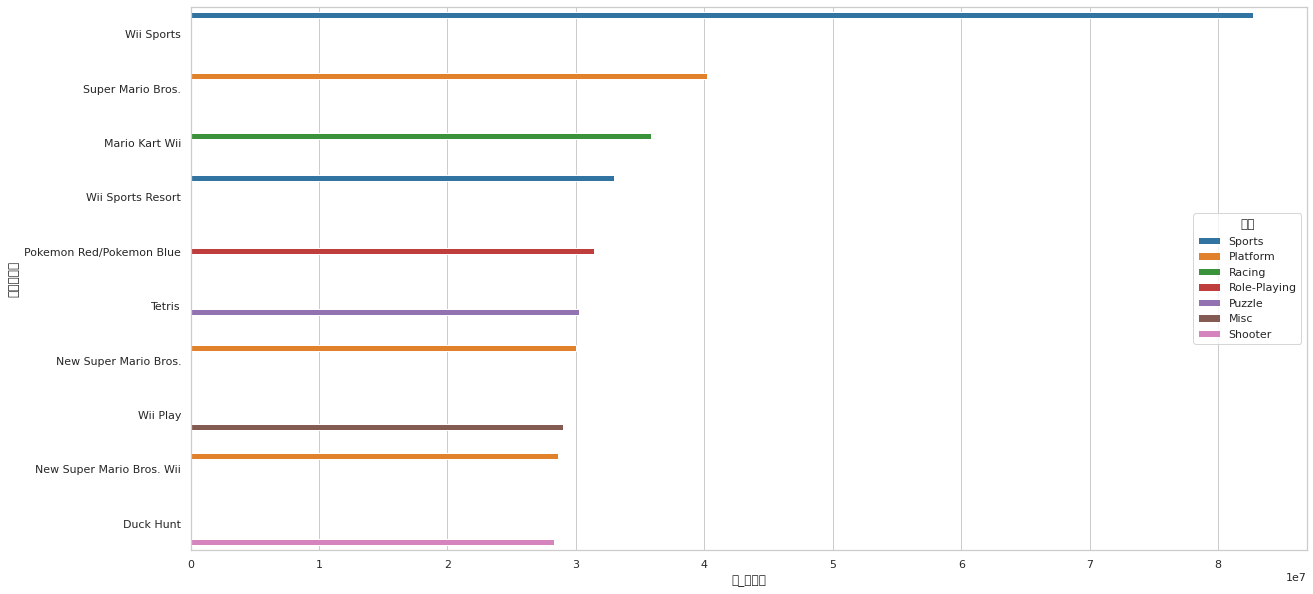

In [85]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.barplot(x = "총_출고량", y = "게임의이름", hue = '장르', data = high_sales_sort)
plt.show()

### 결론

위 그래프를 보아

스포츠 장르의 게임이 2배 이상의 압도적인 수치를 보여주었고,

그 이유로는 휴대용 게임기기인 닌텐도를 이용해

시간과 공간의 제약없이 가능하다는 점에서 많은 사람들이 찾은게 아닐까 생각한다.

또한, 대다수의 사람들이 열광하는 종목인 스포츠인 점에서

소비자들의 구매욕구를 촉진시켰을거라 생각한다.